# 1. 데이터 탐색

In [1]:
import pandas as pd
import os
import numpy as np   #기초모듈

import seaborn as sns
import matplotlib.pyplot as plt  #시각화 모듈
%matplotlib inline

In [2]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize']=[10, 5]
plt.style.use('ggplot')

In [3]:
os.chdir(r'C:\Users\user\Desktop\해심원')

In [4]:
df = pd.read_csv('해양수산부 중앙해양안전심판원_해양사고 통계현황_20200331.csv')
df.head()

,사건번호,사건명,해양사고종류(통계용),해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,계절,...,선박명,선박중요도,선박톤수,톤수범위(통계용),선박용도(통계용),사망합계(선원+여객+기타),실종합계(선원+여객+기타),인명피해합계(사망+실종),부상합계(선원+여객+기타),총합(사망+실종+부상)
0,IC-2016-0189,레저보트 거북호 침수사건,침수,2016,5,12,15,20,12-16시,봄,...,거북호,1,0.0,미상,수상레저기구,0,0,0,0,0
1,IC-2016-0116,"어선 제212영남호, 중국어선 선명미상 충돌사건",충돌,2016,3,22,0,0,0-4시,봄,...,선명미상,2,0.0,미상,어선,0,0,0,0,0
2,MP-2017-0015,어선 만성호 무등록선박 예천호 충돌사건,충돌,2016,11,12,20,54,20-24시,가을,...,예천호,2,0.0,미상,어선,0,0,0,0,0
3,IC-2017-0182,어선 선명무 운항저해사건,운항저해,2017,5,1,6,28,4-8시,봄,...,선명무,1,0.0,미상,어선,0,0,0,0,0
4,IC-2016-0222,레저보트 서해킹호 기관손상사건,기관손상,2016,5,22,18,12,16-20시,봄,...,서해킹호,1,0.0,미상,수상레저기구,0,0,0,0,0


In [5]:
df.info()      #선박톤수 2개의 NA값 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15208 entries, 0 to 15207
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   사건번호            15208 non-null  object 
 1   사건명             15208 non-null  object 
 2   해양사고종류(통계용)     15208 non-null  object 
 3   해양사고발생(년도)      15208 non-null  int64  
 4   해양사고발생(월)       15208 non-null  int64  
 5   해양사고발생(일)       15208 non-null  int64  
 6   해양사고발생(시)       15208 non-null  int64  
 7   해양사고발생(분)       15208 non-null  int64  
 8   해양사고발생시간대       15208 non-null  object 
 9   계절              15208 non-null  object 
 10  해양사고장소(위)       15208 non-null  object 
 11  해양사고장소(위도)      15208 non-null  object 
 12  해양사고장소(위분)      15208 non-null  int64  
 13  해양사고장소(위초)      15208 non-null  int64  
 14  해양사고장소(경)       15208 non-null  object 
 15  해양사고장소(경도)      15208 non-null  object 
 16  해양사고장소(경분)      15208 non-null  int64  
 17  해양사고장소(경초)      15208 non-null 

In [6]:
df['해양사고발생지역(중)'].unique() #개항 및 진입수로 = '지역별 항구 및 진입 수로' 를 의미 (영해 or 해상 x)

array(['서해영해', '기타', '남해영해', '동해영해', '남해공해', '개항 및 진입수로', '동해공해', '서해공해'],
      dtype=object)

In [7]:
west_df = df[df['해양사고발생지역(중)'].str.contains('서해')]  #서해 공해/영해 모두 인천지방해양안전심판원 관할
west_df.head()

,사건번호,사건명,해양사고종류(통계용),해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,계절,...,선박명,선박중요도,선박톤수,톤수범위(통계용),선박용도(통계용),사망합계(선원+여객+기타),실종합계(선원+여객+기타),인명피해합계(사망+실종),부상합계(선원+여객+기타),총합(사망+실종+부상)
0,IC-2016-0189,레저보트 거북호 침수사건,침수,2016,5,12,15,20,12-16시,봄,...,거북호,1,0.0,미상,수상레저기구,0,0,0,0,0
2,MP-2017-0015,어선 만성호 무등록선박 예천호 충돌사건,충돌,2016,11,12,20,54,20-24시,가을,...,예천호,2,0.0,미상,어선,0,0,0,0,0
3,IC-2017-0182,어선 선명무 운항저해사건,운항저해,2017,5,1,6,28,4-8시,봄,...,선명무,1,0.0,미상,어선,0,0,0,0,0
4,IC-2016-0222,레저보트 서해킹호 기관손상사건,기관손상,2016,5,22,18,12,16-20시,봄,...,서해킹호,1,0.0,미상,수상레저기구,0,0,0,0,0
5,IC-2016-0252,레저보트 선명무 운항저해사건,운항저해,2016,6,12,10,55,8-12시,여름,...,선명무,1,0.0,미상,수상레저기구,0,0,0,0,0


# 2. EDA (Explorator Data Analysis)

## 2.1. 사고발생 현황

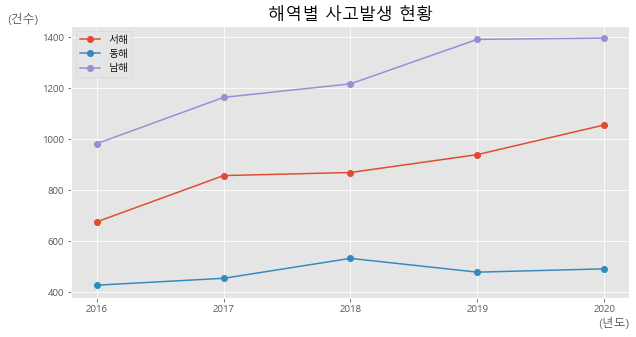

In [10]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(west_df['해양사고발생(년도)'].value_counts(), marker='o', label='서해')
ax.plot(df[df['해양사고발생지역(중)'].str.contains('동해')]['해양사고발생(년도)'].value_counts().sort_index(), marker='o', label='동해')
ax.plot(df[df['해양사고발생지역(중)'].str.contains('남해')]['해양사고발생(년도)'].value_counts().sort_index(), marker='o', label='남해')

ax.legend()
plt.title('해역별 사고발생 현황', fontsize=17)
plt.ylabel('(건수)', loc='top', rotation=0)
plt.xlabel('(년도)', loc='right')
plt.xticks(np.arange(2016,2021))
plt.show()

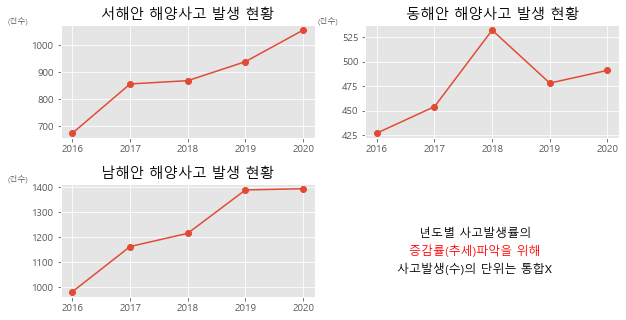

In [11]:
fig = plt.figure()

sub1 = fig.add_subplot(221)
sub2 = fig.add_subplot(222)
sub3 = fig.add_subplot(223)

sub1.plot(west_df['해양사고발생(년도)'].value_counts(), marker='o')
sub2.plot(df[df['해양사고발생지역(중)'].str.contains('동해')]['해양사고발생(년도)'].value_counts().sort_index(), marker='o')
    #2018년의 값이 가장 크기때문에 sort_index를 하지 않으면 연속적 그래프 출력 X
sub3.plot(df[df['해양사고발생지역(중)'].str.contains('남해')]['해양사고발생(년도)'].value_counts().sort_index(), marker='o')

sub1.title.set_text('서해안 해양사고 발생 현황')
sub2.title.set_text('동해안 해양사고 발생 현황')
sub3.title.set_text('남해안 해양사고 발생 현황')

sub1.set_ylabel('(건수)', loc='top', fontsize=8, rotation=0)
sub2.set_ylabel('(건수)', loc='top', fontsize=8, rotation=0)
sub3.set_ylabel('(건수)', loc='top', fontsize=8, rotation=0)     #subplot별 ylabel 붙히기

fig.text(0.7, 0.3, '년도별 사고발생률의', ha='center', va='center', fontsize=12)                 #파라미터:(x축길이, y축높이, '글자')
fig.text(0.7, 0.25, '증감률(추세)파악을 위해', ha='center', va='center', fontsize=12, color='red')
fig.text(0.7, 0.2, '사고발생(수)의 단위는 통합X', ha='center', va='center', fontsize=12)         #fig내 공간에 text삽입

plt.subplots_adjust(hspace=.4)

## 2.2. 해역별 사고발생 비율

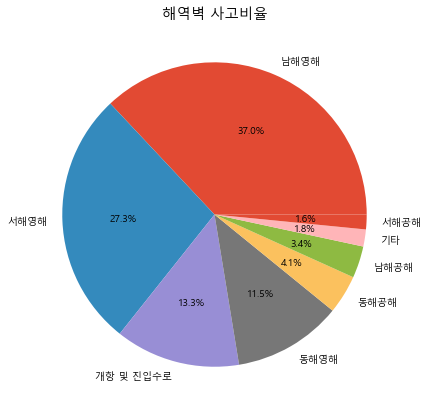

In [40]:
plt.figure(figsize=(7,7))
plt.pie(west_df['해양사고발생지역(중)'].value_counts(), labels=west_df['해양사고발생지역(중)'].value_counts().index, autopct='%1.1f%%')
plt.title('해역벽 사고비율')
plt.show()

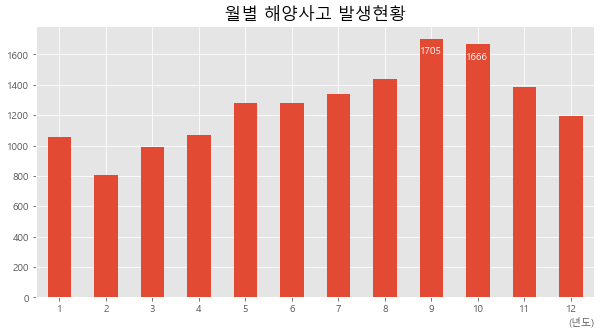

In [12]:
df['해양사고발생(월)'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=360)
plt.text(7.75, 1705-100, '1705', size=10, color='white')
plt.text(8.75, 1666-100, '1666', size=10, color='white')

plt.title('월별 해양사고 발생현황', fontsize=17)
plt.xlabel('(년도)', loc='right', fontsize=10)
plt.show()

## 2.3. 사고 종류

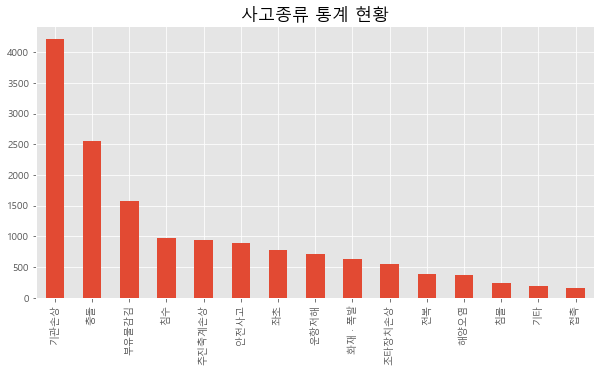

In [13]:
df['해양사고종류(통계용)'].value_counts().plot(kind='bar')
plt.title('사고종류 통계 현황', fontsize=17)
plt.show()

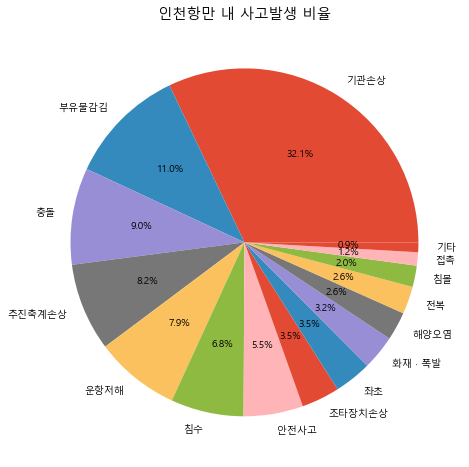

In [14]:
fig = plt.figure(figsize=(8,8))

plt.pie(pd.read_csv('인천항만_전체사건.csv', encoding='euc-kr')['해양사고종류(통계용)'].value_counts(),
        labels=pd.read_csv('인천항만_전체사건.csv', encoding='euc-kr')['해양사고종류(통계용)'].value_counts().index, autopct='%1.1f%%')
plt.title('인천항만 내 사고발생 비율')
plt.show()

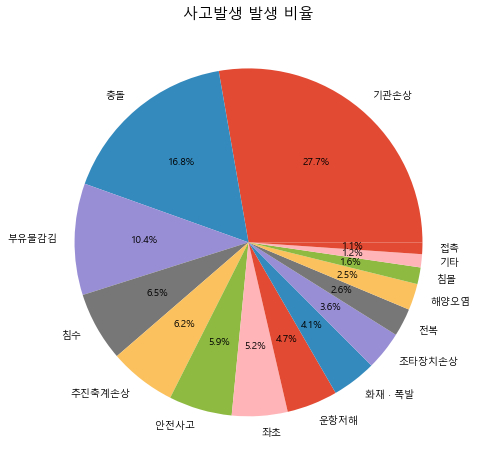

In [15]:
fig = plt.figure(figsize=(8,8))

plt.pie(df['해양사고종류(통계용)'].value_counts(), labels=df['해양사고종류(통계용)'].value_counts().index, autopct='%1.1f%%')
plt.title('사고발생 발생 비율', fontsize=15)
plt.show()

## 2.4. 선박 종류에 따른 사고 발생 현황

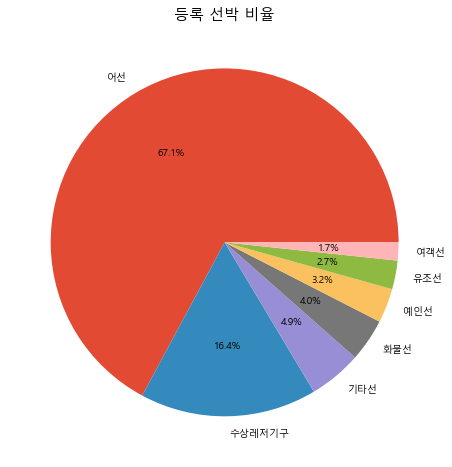

In [16]:
fig = plt.figure(figsize=(8,8))

plt.pie(df['선박용도(통계용)'].value_counts(), labels=df['선박용도(통계용)'].value_counts().index, autopct='%1.1f%%')
plt.title('등록 선박 비율', fontsize=15)
plt.show()

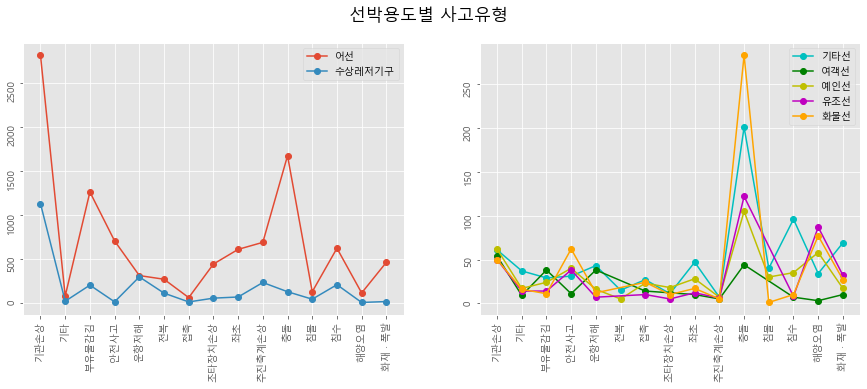

In [17]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax_1 = fig.add_subplot(1,2,2)

ax.plot(df[df['선박용도(통계용)']=='어선']['해양사고종류(통계용)'].value_counts().sort_index(), marker='o', label='어선')
ax.plot(df[df['선박용도(통계용)']=='수상레저기구']['해양사고종류(통계용)'].value_counts().sort_index(), marker='o', label='수상레저기구')

ax_1.plot(df[df['선박용도(통계용)']=='기타선']['해양사고종류(통계용)'].value_counts().sort_index(), marker='o', label='기타선',color='c')
ax_1.plot(df[df['선박용도(통계용)']=='여객선']['해양사고종류(통계용)'].value_counts().sort_index(), marker='o', label='여객선',color='g')
ax_1.plot(df[df['선박용도(통계용)']=='예인선']['해양사고종류(통계용)'].value_counts().sort_index(), marker='o', label='예인선',color='y')
ax_1.plot(df[df['선박용도(통계용)']=='유조선']['해양사고종류(통계용)'].value_counts().sort_index(), marker='o', label='유조선',color='m')
ax_1.plot(df[df['선박용도(통계용)']=='화물선']['해양사고종류(통계용)'].value_counts().sort_index(), marker='o', label='화물선',color='orange')

ax.tick_params(rotation=90)
ax_1.tick_params(rotation=90)
ax.legend()
ax_1.legend()

plt.suptitle('선박용도별 사고유형', fontsize=17)
plt.show()

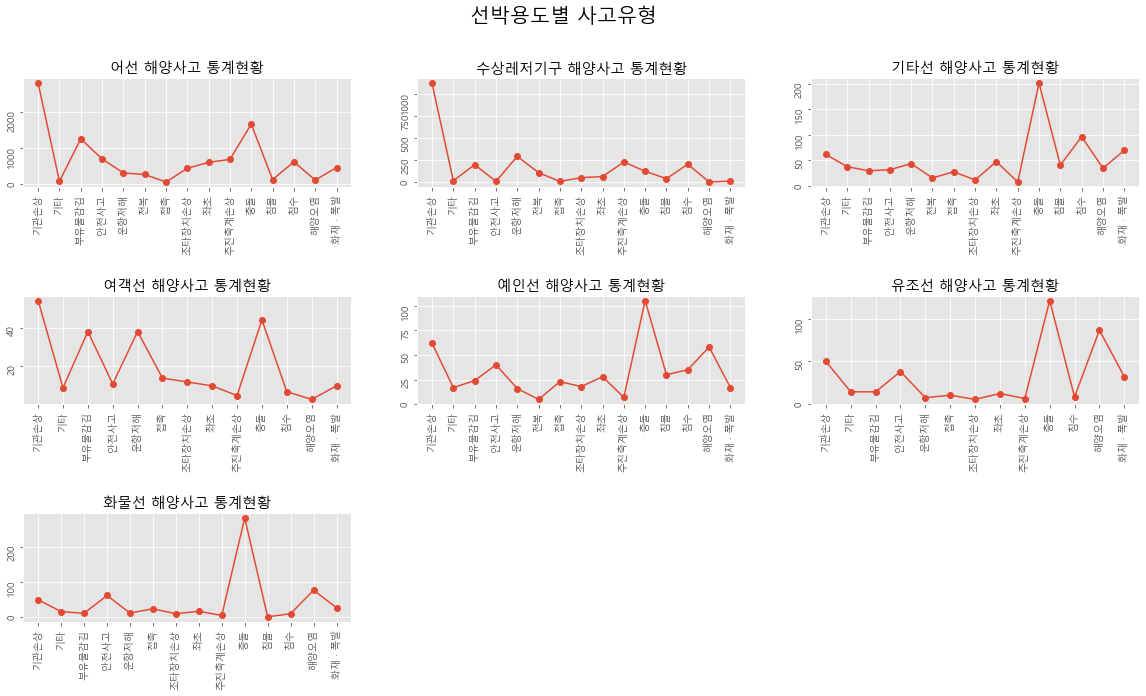

In [18]:
fig = plt.figure(figsize=(20,10))


sub1 = fig.add_subplot(331)
sub2 = fig.add_subplot(332)
sub3 = fig.add_subplot(333)
sub4 = fig.add_subplot(334)
sub5 = fig.add_subplot(335)
sub6 = fig.add_subplot(336)
sub7 = fig.add_subplot(337)

sub1.plot(df[df['선박용도(통계용)']=='어선']['해양사고종류(통계용)'].value_counts().sort_index(), marker='o')
sub2.plot(df[df['선박용도(통계용)']=='수상레저기구']['해양사고종류(통계용)'].value_counts().sort_index(), marker='o')
sub3.plot(df[df['선박용도(통계용)']=='기타선']['해양사고종류(통계용)'].value_counts().sort_index(), marker='o')
sub4.plot(df[df['선박용도(통계용)']=='여객선']['해양사고종류(통계용)'].value_counts().sort_index(), marker='o')
sub5.plot(df[df['선박용도(통계용)']=='예인선']['해양사고종류(통계용)'].value_counts().sort_index(), marker='o')
sub6.plot(df[df['선박용도(통계용)']=='유조선']['해양사고종류(통계용)'].value_counts().sort_index(), marker='o')
sub7.plot(df[df['선박용도(통계용)']=='화물선']['해양사고종류(통계용)'].value_counts().sort_index(), marker='o')

sub1.title.set_text('어선 해양사고 통계현황')
sub2.title.set_text('수상레저기구 해양사고 통계현황')
sub3.title.set_text('기타선 해양사고 통계현황')
sub4.title.set_text('여객선 해양사고 통계현황')
sub5.title.set_text('예인선 해양사고 통계현황')
sub6.title.set_text('유조선 해양사고 통계현황')
sub7.title.set_text('화물선 해양사고 통계현황')

sub1.tick_params(rotation=90)
sub2.tick_params(rotation=90)
sub3.tick_params(rotation=90)
sub4.tick_params(rotation=90)
sub5.tick_params(rotation=90)
sub6.tick_params(rotation=90)
sub7.tick_params(rotation=90)                 #각 subplot의 xticks 각도 조절

plt.subplots_adjust(hspace=1)
plt.suptitle('선박용도별 사고유형', fontsize=20)
plt.show()

## 2.5. 사고발생 종류별 선박유형

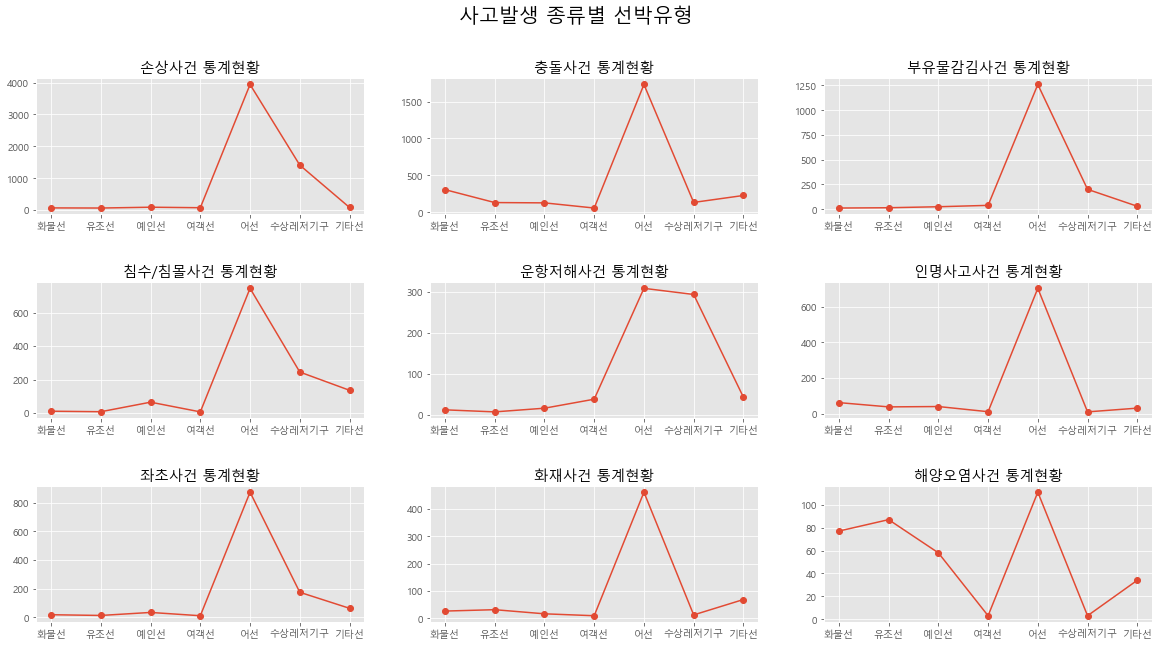

In [20]:
fig = plt.figure(figsize=(20,10))


sub1 = fig.add_subplot(331)
sub2 = fig.add_subplot(332)
sub3 = fig.add_subplot(333)
sub4 = fig.add_subplot(334)
sub5 = fig.add_subplot(335)
sub6 = fig.add_subplot(336)
sub7 = fig.add_subplot(337)
sub8 = fig.add_subplot(338)
sub9 = fig.add_subplot(339)


sub1.plot(df[df['해양사고종류(통계용)'].str.contains('기관손상|추진축계손상|조타장치손상')]['선박용도(통계용)'].value_counts().sort_index(ascending=False), marker='o')
sub2.plot(df[df['해양사고종류(통계용)'].str.contains('접촉|충돌')]['선박용도(통계용)'].value_counts().sort_index(ascending=False), marker='o')
sub3.plot(df[df['해양사고종류(통계용)']=='부유물감김']['선박용도(통계용)'].value_counts().sort_index(ascending=False), marker='o')
sub4.plot(df[df['해양사고종류(통계용)'].str.contains('침수|침몰')]['선박용도(통계용)'].value_counts().sort_index(ascending=False), marker='o')
sub5.plot(df[df['해양사고종류(통계용)']=='운항저해']['선박용도(통계용)'].value_counts().sort_index(ascending=False), marker='o')
sub6.plot(df[df['해양사고종류(통계용)']=='안전사고']['선박용도(통계용)'].value_counts().sort_index(ascending=False), marker='o')
sub7.plot(df[df['해양사고종류(통계용)'].str.contains('전복|좌초')]['선박용도(통계용)'].value_counts().sort_index(ascending=False), marker='o')
sub8.plot(df[df['해양사고종류(통계용)']=='화재 · 폭발']['선박용도(통계용)'].value_counts().sort_index(ascending=False), marker='o')
sub9.plot(df[df['해양사고종류(통계용)']=='해양오염']['선박용도(통계용)'].value_counts().sort_index(ascending=False), marker='o')


sub1.title.set_text('손상사건 통계현황')
sub2.title.set_text('충돌사건 통계현황')
sub3.title.set_text('부유물감김사건 통계현황')
sub4.title.set_text('침수/침몰사건 통계현황')
sub5.title.set_text('운항저해사건 통계현황')
sub6.title.set_text('인명사고사건 통계현황')
sub7.title.set_text('좌초사건 통계현황')
sub8.title.set_text('화재사건 통계현황')
sub9.title.set_text('해양오염사건 통계현황')


plt.subplots_adjust(hspace=.5)
plt.suptitle('사고발생 종류별 선박유형', fontsize=20)
plt.show()

* 어선, 레저기구, 여객선 -> 기관손상사고 가장 많음
* 기타선, 예인선, 유조선, 화물선 -> 충돌사고 가장 많음

## 2.6. 시간대

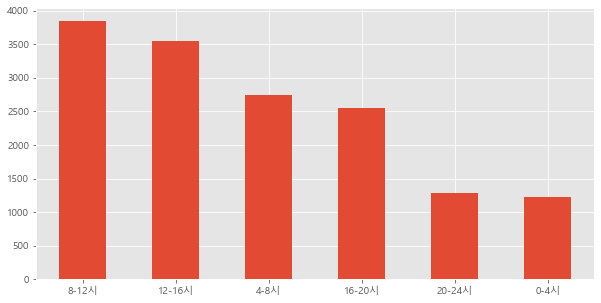

In [19]:
df['해양사고발생시간대'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

> 기본적으로 어선의 숫자가 많아 발생하는 쏠림 현상으로 어선을 제외한 '비율'자체에 의미를 찾아볼 필요도 있음 \
> => <u>어선/레저기구의 숫자가 월등이 높아 나타나는 통계의 결과를 절대 간과X<u>
* 손상사건 = 기관손상, 추진축계 손상, 조타장치손상
* 충돌사건 = 접촉, 충돌
* 좌초사건 = 전복, 좌초

In [ ]:
df['선박용도(통계용)'].value_counts()  #수집된 사고현황의 선박용도별 대수

어선        10211
수상레저기구     2499
기타선         748
화물선         605
예인선         485
유조선         405
여객선         255
Name: 선박용도(통계용), dtype: int64

In [ ]:
df[df['선박용도(통계용)']=='유조선']['해양사고종류(통계용)'].value_counts()

충돌         122
해양오염        87
기관손상        50
안전사고        38
화재 · 폭발     32
기타          14
부유물감김       14
좌초          12
접촉          10
침수           8
운항저해         7
추진축계손상       6
조타장치손상       5
Name: 해양사고종류(통계용), dtype: int64

## 2.7. 유조선 사고발생 비율 환산

In [23]:
u=pd.DataFrame(df[df['선박용도(통계용)']=='유조선']['해양사고종류(통계용)'].value_counts()).reset_index().rename(columns={'index':'사고종류',
                                                                                                    '해양사고종류(통계용)':'건수'})
u

,사고종류,건수
0,충돌,122
1,해양오염,87
2,기관손상,50
3,안전사고,38
4,화재 · 폭발,32
5,기타,14
6,부유물감김,14
7,좌초,12
8,접촉,10
9,침수,8


In [24]:
u['사고비율']=round(u['건수']/405, 3)
u

,사고종류,건수,사고비율
0,충돌,122,0.301
1,해양오염,87,0.215
2,기관손상,50,0.123
3,안전사고,38,0.094
4,화재 · 폭발,32,0.079
5,기타,14,0.035
6,부유물감김,14,0.035
7,좌초,12,0.030
8,접촉,10,0.025
9,침수,8,0.020


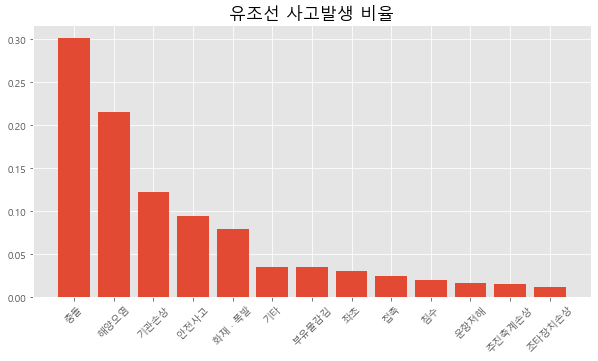

In [25]:
plt.bar(u['사고종류'],u['사고비율'])
plt.xticks(rotation=45)
plt.title('유조선 사고발생 비율', fontsize=17)
plt.show()

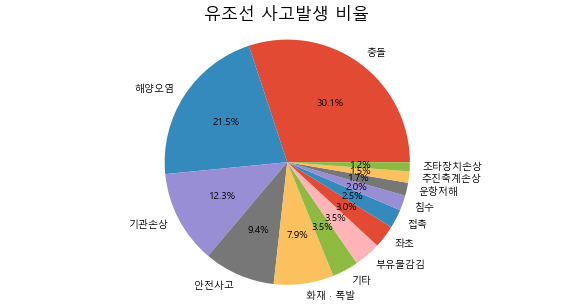

In [26]:
plt.pie(u['사고비율'], labels=u['사고종류'], autopct='%1.1f%%')
plt.title('유조선 사고발생 비율', fontsize=17)
plt.axis('equal') #원을 동그랗게
plt.show()

* EDA결과 사고의 빈도는 1위 기관손상 2위 충돌로 나타남
* 단순 기관손상문제와는 다르게 충돌사고에는 원인이 분명 존재할 수 있다고 판단
* 충돌사고의 영향을 미치는 주된 요인과 원인을 알아낼 수 있다면 해양심판에 있어 사고 관련자에 대한 제시안(주의점)을 만들어 제시할 수 있음
+ 더 나아가 위경도정보를 통해 Q-GIS 지도상에 표시하고 -> 특정지역에서 나타나는 충돌의 종류가 비슷하다면 이에맞는 또다른 인사이트 탐구 가능
*=><u><span style='color:violet'>데이터로 보여지는 팩트에만 집중</span>, 대응책 마련은 관련 전문가들의 몫!<u>*

<ipython-input-27-755af3ad0167>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['해양사고발생지역(중)'].str.contains('서해')][df['해양사고종류(통계용)']=='충돌']['해양사고발생(월)'].value_counts().sort_index().plot(kind='bar')


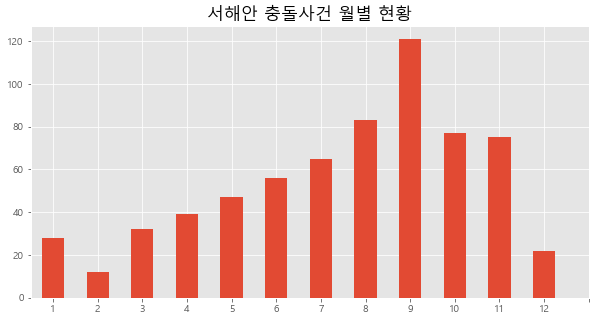

In [27]:
df[df['해양사고발생지역(중)'].str.contains('서해')][df['해양사고종류(통계용)']=='충돌']['해양사고발생(월)'].value_counts().sort_index().plot(kind='bar')
plt.xticks(np.arange(0,13), rotation=0)
plt.title('서해안 충돌사건 월별 현황', fontsize=17)
plt.show()

- 결측치 탐색

In [28]:
df[df['선박톤수'].isna()]

,사건번호,사건명,해양사고종류(통계용),해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,계절,...,선박명,선박중요도,선박톤수,톤수범위(통계용),선박용도(통계용),사망합계(선원+여객+기타),실종합계(선원+여객+기타),인명피해합계(사망+실종),부상합계(선원+여객+기타),총합(사망+실종+부상)
15202,IC-2017-0369,"액체화학품산적운반선 그레이스 삼부호, 예선 창 강 투오8 하오 충돌사건",충돌,2017,7,11,18,10,16-20시,여름,...,창 강 투오8 하오,2,NaN,미상,예인선,0,0,0,0,0
15203,IC-2017-0754,"어선 제37진성호, 컨테이너운반선 절보어운68987 충돌사건",충돌,2017,11,8,14,0,12-16시,가을,...,절보어운68987,2,NaN,미상,화물선,0,0,0,0,0


In [29]:
df[df['톤수범위(통계용)']=='미상']['선박용도(통계용)'].value_counts()

수상레저기구    69
기타선       24
어선        13
화물선        3
예인선        1
여객선        1
Name: 선박용도(통계용), dtype: int64

In [30]:
df['선박용도(통계용)'].value_counts()

어선        10211
수상레저기구     2499
기타선         748
화물선         605
예인선         485
유조선         405
여객선         255
Name: 선박용도(통계용), dtype: int64

## 2.8. 특정 열/컬럼 추출

In [31]:
df.iloc[:5, [1,2,3,4,5,11,15,19,20,23,25]]  #1~4행, 1,2,3,4,5,11,15---열 추출

,사건명,해양사고종류(통계용),해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고장소(위도),해양사고장소(경도),해양사고발생지역(중),해양사고발생지역(통계용),선박톤수,선박용도(통계용)
0,레저보트 거북호 침수사건,침수,2016,5,12,NN36,동E126,서해영해,서해영해,0.0,수상레저기구
1,"어선 제212영남호, 중국어선 선명미상 충돌사건",충돌,2016,3,22,NN30,동E126,기타,기타,0.0,어선
2,어선 만성호 무등록선박 예천호 충돌사건,충돌,2016,11,12,NN34,동E126,서해영해,서해영해,0.0,어선
3,어선 선명무 운항저해사건,운항저해,2017,5,1,NN37,동E126,서해영해,서해영해,0.0,어선
4,레저보트 서해킹호 기관손상사건,기관손상,2016,5,22,NN36,동E126,서해영해,서해영해,0.0,수상레저기구


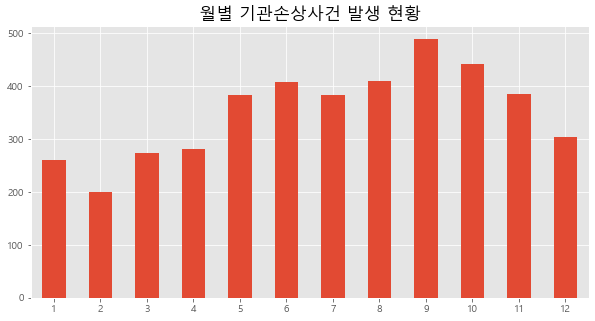

In [32]:
df[df['해양사고종류(통계용)']=='기관손상']['해양사고발생(월)'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('월별 기관손상사건 발생 현황', fontsize=17)
plt.show()

# 3. Data Preprocessing
* 지도학습 방식을 이용해 train/test 셋 분리 후 기관손상에 관한 예측 및 모델링 수행
* 시계열적 요소를 활용, 향후 예측
* 시계열적 요소(추세, 계절성 등등)의 존재유무 파악은 '인천해양안전심판원'의 관할인 '서해'해역을 대상으로 수행

## 3.1. 데이터 추출

In [34]:
west_df = df.iloc[:,[1,2,3,4,5,6,7,8,9,19,23,25]]
west_df                                      #분석을 위해 필요한 DataFrame만 추출

,사건명,해양사고종류(통계용),해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,계절,해양사고발생지역(중),선박톤수,선박용도(통계용)
0,레저보트 거북호 침수사건,침수,2016,5,12,15,20,12-16시,봄,서해영해,0.0,수상레저기구
1,"어선 제212영남호, 중국어선 선명미상 충돌사건",충돌,2016,3,22,0,0,0-4시,봄,기타,0.0,어선
2,어선 만성호 무등록선박 예천호 충돌사건,충돌,2016,11,12,20,54,20-24시,가을,서해영해,0.0,어선
3,어선 선명무 운항저해사건,운항저해,2017,5,1,6,28,4-8시,봄,서해영해,0.0,어선
4,레저보트 서해킹호 기관손상사건,기관손상,2016,5,22,18,12,16-20시,봄,서해영해,0.0,수상레저기구
...,...,...,...,...,...,...,...,...,...,...,...,...
15203,"어선 제37진성호, 컨테이너운반선 절보어운68987 충돌사건",충돌,2017,11,8,14,0,12-16시,가을,기타,NaN,화물선
15204,원양어선 신유한호 해양오염사건,해양오염,2017,5,5,8,33,8-12시,봄,남해영해,4407.0,어선
15205,원양어선 카피딴 팰리예브(KAPITAN FALEYEV) 해양오염사건,해양오염,2017,11,9,9,30,8-12시,가을,개항 및 진입수로,4407.0,어선
15206,어선 카피탄마슬로베츠·어획물운반선 헬시8 충돌사건,충돌,2019,7,29,11,14,8-12시,여름,남해영해,4407.0,어선


## 3.2. 결측값 처리

In [36]:
west_df[west_df['선박톤수'].isna()]

,사건명,해양사고종류(통계용),해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,계절,해양사고발생지역(중),선박톤수,선박용도(통계용)
15202,"액체화학품산적운반선 그레이스 삼부호, 예선 창 강 투오8 하오 충돌사건",충돌,2017,7,11,18,10,16-20시,여름,기타,NaN,예인선
15203,"어선 제37진성호, 컨테이너운반선 절보어운68987 충돌사건",충돌,2017,11,8,14,0,12-16시,가을,기타,NaN,화물선


In [37]:
west_df.fillna(value=0, axis=1, inplace=True) #대부분의 미상값들은 이미 0으로 처리되어있기 때문에 우선 0으로 대입

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [38]:
west_df[15202:15204]  #정상적으로 채워진것을 확인

,사건명,해양사고종류(통계용),해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,계절,해양사고발생지역(중),선박톤수,선박용도(통계용)
15202,"액체화학품산적운반선 그레이스 삼부호, 예선 창 강 투오8 하오 충돌사건",충돌,2017,7,11,18,10,16-20시,여름,기타,0.0,예인선
15203,"어선 제37진성호, 컨테이너운반선 절보어운68987 충돌사건",충돌,2017,11,8,14,0,12-16시,가을,기타,0.0,화물선


## 3.3. 가변수 생성(더미화)

### 3.3.1. '계절' 더미화

In [41]:
west_df['계절'].value_counts()

가을    4755
여름    4060
봄     3340
겨울    3053
Name: 계절, dtype: int64

In [42]:
season_dumies = pd.get_dummies(west_df['계절'])
west_df = west_df.join(season_dumies)

In [43]:
west_df.head(3)  #제대로 더미화 진행 된 것을 확인

,사건명,해양사고종류(통계용),해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,계절,해양사고발생지역(중),선박톤수,선박용도(통계용),가을,겨울,봄,여름
0,레저보트 거북호 침수사건,침수,2016,5,12,15,20,12-16시,봄,서해영해,0.0,수상레저기구,0,0,1,0
1,"어선 제212영남호, 중국어선 선명미상 충돌사건",충돌,2016,3,22,0,0,0-4시,봄,기타,0.0,어선,0,0,1,0
2,어선 만성호 무등록선박 예천호 충돌사건,충돌,2016,11,12,20,54,20-24시,가을,서해영해,0.0,어선,1,0,0,0


In [44]:
west_df.drop(columns='계절', axis=1, inplace=True) #필요없어진 기존의 컬럼 삭제

In [45]:
west_df.head(2) #삭제 완료

,사건명,해양사고종류(통계용),해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,해양사고발생지역(중),선박톤수,선박용도(통계용),가을,겨울,봄,여름
0,레저보트 거북호 침수사건,침수,2016,5,12,15,20,12-16시,서해영해,0.0,수상레저기구,0,0,1,0
1,"어선 제212영남호, 중국어선 선명미상 충돌사건",충돌,2016,3,22,0,0,0-4시,기타,0.0,어선,0,0,1,0


### 3.3.2. 해양사고종류 더미화
- 회귀분석 시 '기관손상'에 대한 영향 및 요인을 도출하기 위해 '기관손상'이라는 값만 더미화하여 컬럼 생성

In [46]:
damage_dumies = pd.get_dummies(west_df['해양사고종류(통계용)'])
west_df = west_df.join(damage_dumies)

In [47]:
west_df.head()          #제대로 더미화 진행 된 것을 확인

,사건명,해양사고종류(통계용),해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,해양사고발생지역(중),선박톤수,...,전복,접촉,조타장치손상,좌초,추진축계손상,충돌,침몰,침수,해양오염,화재 · 폭발
0,레저보트 거북호 침수사건,침수,2016,5,12,15,20,12-16시,서해영해,0.0,...,0,0,0,0,0,0,0,1,0,0
1,"어선 제212영남호, 중국어선 선명미상 충돌사건",충돌,2016,3,22,0,0,0-4시,기타,0.0,...,0,0,0,0,0,1,0,0,0,0
2,어선 만성호 무등록선박 예천호 충돌사건,충돌,2016,11,12,20,54,20-24시,서해영해,0.0,...,0,0,0,0,0,1,0,0,0,0
3,어선 선명무 운항저해사건,운항저해,2017,5,1,6,28,4-8시,서해영해,0.0,...,0,0,0,0,0,0,0,0,0,0
4,레저보트 서해킹호 기관손상사건,기관손상,2016,5,22,18,12,16-20시,서해영해,0.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
west_df.drop(['해양사고종류(통계용)','기타', '부유물감김', '안전사고', '운항저해',
       '전복', '접촉', '조타장치손상', '좌초', '추진축계손상', '충돌', '침몰', '침수', '해양오염',
       '화재 · 폭발'], axis=1, inplace=True)

In [49]:
west_df.head()

,사건명,해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,해양사고발생지역(중),선박톤수,선박용도(통계용),가을,겨울,봄,여름,기관손상
0,레저보트 거북호 침수사건,2016,5,12,15,20,12-16시,서해영해,0.0,수상레저기구,0,0,1,0,0
1,"어선 제212영남호, 중국어선 선명미상 충돌사건",2016,3,22,0,0,0-4시,기타,0.0,어선,0,0,1,0,0
2,어선 만성호 무등록선박 예천호 충돌사건,2016,11,12,20,54,20-24시,서해영해,0.0,어선,1,0,0,0,0
3,어선 선명무 운항저해사건,2017,5,1,6,28,4-8시,서해영해,0.0,어선,0,0,1,0,0
4,레저보트 서해킹호 기관손상사건,2016,5,22,18,12,16-20시,서해영해,0.0,수상레저기구,0,0,1,0,1


In [50]:
west_df['기관손상'].value_counts()

0    10989
1     4219
Name: 기관손상, dtype: int64

### 3.3.3. 선박용도 더미화

In [52]:
purpose_df = pd.get_dummies(west_df['선박용도(통계용)'])
west_df = west_df.join(purpose_df)

In [53]:
west_df.head(3)

,사건명,해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,해양사고발생지역(중),선박톤수,선박용도(통계용),...,봄,여름,기관손상,기타선,수상레저기구,어선,여객선,예인선,유조선,화물선
0,레저보트 거북호 침수사건,2016,5,12,15,20,12-16시,서해영해,0.0,수상레저기구,...,1,0,0,0,1,0,0,0,0,0
1,"어선 제212영남호, 중국어선 선명미상 충돌사건",2016,3,22,0,0,0-4시,기타,0.0,어선,...,1,0,0,0,0,1,0,0,0,0
2,어선 만성호 무등록선박 예천호 충돌사건,2016,11,12,20,54,20-24시,서해영해,0.0,어선,...,0,0,0,0,0,1,0,0,0,0


In [54]:
west_df.drop('선박용도(통계용)', axis=1, inplace=True)

In [55]:
west_df.head(2)

,사건명,해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,해양사고발생지역(중),선박톤수,가을,...,봄,여름,기관손상,기타선,수상레저기구,어선,여객선,예인선,유조선,화물선
0,레저보트 거북호 침수사건,2016,5,12,15,20,12-16시,서해영해,0.0,0,...,1,0,0,0,1,0,0,0,0,0
1,"어선 제212영남호, 중국어선 선명미상 충돌사건",2016,3,22,0,0,0-4시,기타,0.0,0,...,1,0,0,0,0,1,0,0,0,0


## 3.4. 해양사고 발생지역 전처리

In [56]:
west_df['해양사고발생지역(중)'].value_counts()

남해영해         5627
서해영해         4153
개항 및 진입수로    2019
동해영해         1756
동해공해          626
남해공해          514
기타            275
서해공해          238
Name: 해양사고발생지역(중), dtype: int64

In [57]:
#인천해양안전심판원은 서해 관할구역이기때문에 서해 공해/영해만 출력

west_df = west_df[west_df['해양사고발생지역(중)'].str.contains('서해')]

## 3.5. datetime 형태의 컬럼 도출
- 해양사고 발생 '년도', '월', '일', '시', '분'을 sum

In [58]:
temp_df = west_df.iloc[:,[1,2,3,4,5]]
temp_df

,해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분)
0,2016,5,12,15,20
2,2016,11,12,20,54
3,2017,5,1,6,28
4,2016,5,22,18,12
5,2016,6,12,10,55
...,...,...,...,...,...
15141,2016,8,7,14,40
15153,2018,8,16,9,43
15165,2018,4,8,6,27
15170,2017,6,27,5,50


In [59]:
temp_df = temp_df.astype(str)  #매우중요! str변환후 다시 선언해줘야 str타입으로 저장되고 이어붙이기 가능해짐

west_df['해양사고발생시간'] = temp_df['해양사고발생(년도)']+'-'+temp_df['해양사고발생(월)']+'-' +temp_df['해양사고발생(일)']+' '+temp_df['해양사고발생(시)']+':'+temp_df['해양사고발생(분)']

In [60]:
west_df['해양사고발생시간'] = pd.to_datetime(west_df['해양사고발생시간'], format='%Y-%m-%d %H:%M')

In [62]:
west_df.head()

,사건명,해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,해양사고발생지역(중),선박톤수,가을,...,여름,기관손상,기타선,수상레저기구,어선,여객선,예인선,유조선,화물선,해양사고발생시간
0,레저보트 거북호 침수사건,2016,5,12,15,20,12-16시,서해영해,0.0,0,...,0,0,0,1,0,0,0,0,0,2016-05-12 15:20:00
2,어선 만성호 무등록선박 예천호 충돌사건,2016,11,12,20,54,20-24시,서해영해,0.0,1,...,0,0,0,0,1,0,0,0,0,2016-11-12 20:54:00
3,어선 선명무 운항저해사건,2017,5,1,6,28,4-8시,서해영해,0.0,0,...,0,0,0,0,1,0,0,0,0,2017-05-01 06:28:00
4,레저보트 서해킹호 기관손상사건,2016,5,22,18,12,16-20시,서해영해,0.0,0,...,0,1,0,1,0,0,0,0,0,2016-05-22 18:12:00
5,레저보트 선명무 운항저해사건,2016,6,12,10,55,8-12시,서해영해,0.0,0,...,1,0,0,1,0,0,0,0,0,2016-06-12 10:55:00


In [64]:
#datetime형태가 존재하기 때문에 기존의 컬럼은 삭제
#서해로 추출하는데 이미 사용한 '해양사고발생지역(중)'삭제
west_df.drop(['해양사고발생지역(중)','해양사고발생(년도)', '해양사고발생(월)', '해양사고발생(일)', '해양사고발생(시)', '해양사고발생(분)',
       '해양사고발생시간대'], axis=1, inplace=True)
west_df.head()

,사건명,선박톤수,가을,겨울,봄,여름,기관손상,기타선,수상레저기구,어선,여객선,예인선,유조선,화물선,해양사고발생시간
0,레저보트 거북호 침수사건,0.0,0,0,1,0,0,0,1,0,0,0,0,0,2016-05-12 15:20:00
2,어선 만성호 무등록선박 예천호 충돌사건,0.0,1,0,0,0,0,0,0,1,0,0,0,0,2016-11-12 20:54:00
3,어선 선명무 운항저해사건,0.0,0,0,1,0,0,0,0,1,0,0,0,0,2017-05-01 06:28:00
4,레저보트 서해킹호 기관손상사건,0.0,0,0,1,0,1,0,1,0,0,0,0,0,2016-05-22 18:12:00
5,레저보트 선명무 운항저해사건,0.0,0,0,0,1,0,0,1,0,0,0,0,0,2016-06-12 10:55:00


In [65]:
west_df['해양사고발생시간'].dt.day_name().value_counts() #고루 분포되어있어 파생변수로 쓸 수 있을듯?

Sunday       819
Saturday     809
Thursday     604
Friday       579
Tuesday      546
Wednesday    537
Monday       497
Name: 해양사고발생시간, dtype: int64

In [66]:
west_df['요일'] = west_df['해양사고발생시간'].dt.day_name()
west_df.head()

,사건명,선박톤수,가을,겨울,봄,여름,기관손상,기타선,수상레저기구,어선,여객선,예인선,유조선,화물선,해양사고발생시간,요일
0,레저보트 거북호 침수사건,0.0,0,0,1,0,0,0,1,0,0,0,0,0,2016-05-12 15:20:00,Thursday
2,어선 만성호 무등록선박 예천호 충돌사건,0.0,1,0,0,0,0,0,0,1,0,0,0,0,2016-11-12 20:54:00,Saturday
3,어선 선명무 운항저해사건,0.0,0,0,1,0,0,0,0,1,0,0,0,0,2017-05-01 06:28:00,Monday
4,레저보트 서해킹호 기관손상사건,0.0,0,0,1,0,1,0,1,0,0,0,0,0,2016-05-22 18:12:00,Sunday
5,레저보트 선명무 운항저해사건,0.0,0,0,0,1,0,0,1,0,0,0,0,0,2016-06-12 10:55:00,Sunday


## 3.6. '요일' 가변수 생성

In [67]:
day_dumies = pd.get_dummies(west_df['요일'])
west_df = west_df.join(day_dumies)

In [68]:
west_df.drop('요일',axis=1, inplace=True)
west_df.head()

,사건명,선박톤수,가을,겨울,봄,여름,기관손상,기타선,수상레저기구,어선,...,유조선,화물선,해양사고발생시간,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,레저보트 거북호 침수사건,0.0,0,0,1,0,0,0,1,0,...,0,0,2016-05-12 15:20:00,0,0,0,0,1,0,0
2,어선 만성호 무등록선박 예천호 충돌사건,0.0,1,0,0,0,0,0,0,1,...,0,0,2016-11-12 20:54:00,0,0,1,0,0,0,0
3,어선 선명무 운항저해사건,0.0,0,0,1,0,0,0,0,1,...,0,0,2017-05-01 06:28:00,0,1,0,0,0,0,0
4,레저보트 서해킹호 기관손상사건,0.0,0,0,1,0,1,0,1,0,...,0,0,2016-05-22 18:12:00,0,0,0,1,0,0,0
5,레저보트 선명무 운항저해사건,0.0,0,0,0,1,0,0,1,0,...,0,0,2016-06-12 10:55:00,0,0,0,1,0,0,0


# 4. 상관분석

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


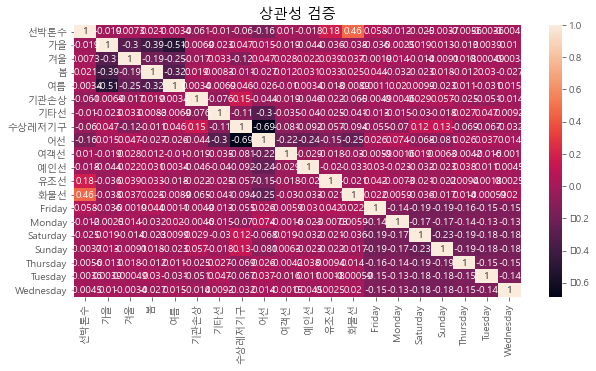

In [69]:
sns.heatmap(west_df.corr(), annot=True)
plt.title('상관성 검증')
plt.show()               

# 5. Modeling

## 5.1. 데이터 분할

In [70]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(west_df, test_size=0.3)

In [71]:
train.columns

Index(['사건명', '선박톤수', '가을', '겨울', '봄', '여름', '기관손상', '기타선', '수상레저기구', '어선',
       '여객선', '예인선', '유조선', '화물선', '해양사고발생시간', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [72]:
x_train_df = train.drop(['사건명','기관손상', '해양사고발생시간'], axis=1)
y_train_df = train['기관손상']

x_test_df = test.drop(['사건명', '기관손상', '해양사고발생시간'], axis=1)

In [73]:
x_train_df.head(2)

,선박톤수,가을,겨울,봄,여름,기타선,수상레저기구,어선,여객선,예인선,유조선,화물선,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
10800,9.77,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4995,1.94,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [74]:
y_train_df.head(2)

10800    0
4995     1
Name: 기관손상, dtype: uint8

In [75]:
x_test_df.head(2)

,선박톤수,가을,겨울,봄,여름,기타선,수상레저기구,어선,여객선,예인선,유조선,화물선,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
7868,7.93,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
15,0.00,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


## 5.2. 최적 머신러닝 알고리즘 도출

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [77]:
#로지스틱 회귀

logreg = LogisticRegression()
logreg.fit(x_train_df, y_train_df)

y_pred = logreg.predict(x_test_df)

logreg.score(x_train_df, y_train_df)

0.7321835340058575

In [78]:
#랜덤포레스트

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train_df, y_train_df)

y_pred = random_forest.predict(x_test_df)

random_forest.score(x_train_df, y_train_df)

0.9082329970712658

In [79]:
#서포트 벡터 머신

svc = SVC()

svc.fit(x_train_df, y_train_df)

Y_pred = svc.predict(x_test_df)

svc.score(x_train_df, y_train_df)

0.7321835340058575

In [80]:
#최근접이웃

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train_df, y_train_df)

Y_pred = knn.predict(x_test_df)

knn.score(x_train_df, y_train_df)

0.7992190042303937

In [81]:
#랜덤포레스트의 결과가 가장 높으므로 채택

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train_df, y_train_df)

y_pred = random_forest.predict(x_test_df)

random_forest.score(x_train_df, y_train_df)

0.9082329970712658

## 5.3. 실제값과 예측값 비교

In [82]:
sample = pd.DataFrame({'사건명':test['사건명'], '기관손상_pred':y_pred})
sample.head()

,사건명,기관손상_pred
7868,"낚시어선 남부스타호, 모터보트 트로피호 충돌사건",0
15,선명미상 어선 운항저해사건,0
10892,낚시어선 푸른바다호 교각접촉사건,0
9050,낚시어선 뉴라이브호 좌초사건,0
11326,어선 문창호 부유물감김사건,1


In [83]:
random_forest_df = pd.concat([test['사건명'], test['기관손상'], sample['기관손상_pred']], axis=1)
random_forest_df.head()

,사건명,기관손상,기관손상_pred
7868,"낚시어선 남부스타호, 모터보트 트로피호 충돌사건",0,0
15,선명미상 어선 운항저해사건,0,0
10892,낚시어선 푸른바다호 교각접촉사건,0,0
9050,낚시어선 뉴라이브호 좌초사건,0,0
11326,어선 문창호 부유물감김사건,0,1


In [84]:
random_forest_df[random_forest_df['기관손상'] != random_forest_df['기관손상_pred']] #못맞춘 컬럼 확인 및 갯수 확인

,사건명,기관손상,기관손상_pred
11326,어선 문창호 부유물감김사건,0,1
14354,어선 효성호 부유물감김사건,0,1
5784,모터보트 해상호 기관손상사건,1,0
921,어선 3재승호 어선 해광3호 충돌사건,0,1
8962,어선 부림호 기관손상사건,1,0
...,...,...,...
3025,어선 창성호 기관손상사건,1,0
1501,레저보트 써니호 기관손상사건,1,0
10644,낚시어선 뉴빅토리호 기관손상사건,1,0
9772,예인선 오대양12호의 피예인부선 태양22호 침수사건,0,1


## 5.4. 분석결과 검토

In [86]:
from statsmodels.formula.api import ols

In [87]:
res = ols('기관손상~선박톤수+가을+겨울+여름+기타선+수상레저기구+어선+여객선+\
        예인선+유조선+화물선+Friday+Monday+Saturday+Sunday+Thursday+Tuesday+Wednesday', data=test).fit()

In [88]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   기관손상   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.602
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           0.000520
Time:                        15:31:21   Log-Likelihood:                -802.55
No. Observations:                1318   AIC:                             1639.
Df Residuals:                    1301   BIC:                             1727.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1882      0.028      6.750      0.000       0.134       0.243
선박톤수       -2.537e-06   2.48e-06     -1.022      0.307   -7.41e-06    2.33e-06
가을            -0.0264      0.035     -0.750      0.453      -0.095       0.043
겨울            -0.0142      0.044     -0.319      0.749      -0.101       0.073
여름            -0.0072      0.036     -0.197      0.844      -0.079       0.064
기타선           -0.0503      0.055     -0.921      0.357      -0.158       0.057
수상레저기구         0.2051      0.034      5.993      0.000       0.138       0.272
어선             0.0722      0.027      2.646      0.008       0.019       0.126
여객선           -0.0017      0.074     -0.023      0.982      -0.148       0.144
예인선           -0.0353      0.064     -0.553      0.581      -0.161       0.090
유조선            0.0066      0.088      0.075      0.940      -0.166       0.180
화물선           -0.0084      0.068     -0.123      0.902      -0.142       0.125
Friday         0.0328      0.032      1.023      0.306      -0.030       0.096
Monday         0.0443      0.034      1.293      0.196      -0.023       0.111
Saturday       0.0610      0.028      2.158      0.031       0.006       0.116
Sunday         0.0231      0.028      0.831      0.406      -0.031       0.078
Thursday       0.0038      0.032      0.120      0.905      -0.058       0.066
Tuesday        0.0005      0.031      0.017      0.986      -0.061       0.062
Wednesday      0.0227      0.032      0.700      0.484      -0.041       0.086
==============================================================================
Omnibus:                      487.374   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.947
Skew:                           0.902   Prob(JB):                     2.14e-52
Kurtosis:                       1.961   Cond. No.                     6.49e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- score 점수 90퍼센트 넘는 결과의 이유는 '해양사고발생시간' 때문이였던듯
- 가지고있는 요인(Factor)들에는 '기관'자체를 특정할 수 있는 변수들이 거의 없음
- 예측모델을 활용한 예측 자체에는 성공했지만, 주된 요인인 주 요인을 도출하는데에는 한계점이 존재